In [1]:
## https://gplearn.readthedocs.io/en/stable/examples.html

In [2]:
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [3]:

def function(x0,x1):
    #return 2.5*x0**4 - 1.3*x0**3 + 0.5*x1**2 - 1.7*x1
    return x0**2 + x1**2 - x1 - x0 + 1


def function_w_noise(x0,x1,A):
    noise = np.random.normal(0,A,np.shape(x0))
    return function(x0,x1) + noise


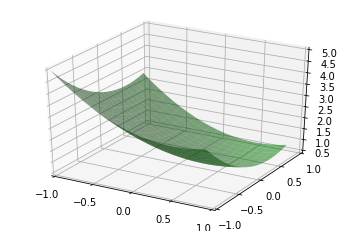

In [4]:
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = function(x0,x1)

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, .5))
ax.set_yticks(np.arange(-1, 1.01, .5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()

In [5]:
#GENERATE TRAIN DATA AND TEST DATA FROM THE FUNCTION
rng = check_random_state(0)
noise = 0.1

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
x0_train = X_train[:, 0]
x1_train = X_train[:, 1]
y_train = function_w_noise(x0_train,x1_train,noise)

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
x0_test = X_test[:, 0]
x1_test = X_test[:, 1]
y_test = function_w_noise(x0_test,x1_test,noise)

In [6]:

est_gp = SymbolicRegressor(population_size=5000,
                        generations=20,
                        stopping_criteria=0.01,
                        p_crossover=0.7, p_subtree_mutation=0.1,
                        p_hoist_mutation=0.05, p_point_mutation=0.1,
                        max_samples=0.9, verbose=1,
                        parsimony_coefficient=0.01, random_state=0,
                        function_set = ['add', 'sub', 'mul', 'div'])
#function_set = ['add', 'sub', 'mul', 'div','sqrt','log','abs','neg',
#               'inv','max','min','sin','cos','tan']

est_gp.fit(X_train,y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          458.897       11         0.398978         0.530015     59.32s
   1    11.33          2.75686       15         0.366939         0.423656     33.75s
   2     9.98          2.63704       13         0.276387           0.2348     31.16s
   3    10.67          1.60954       13         0.258791         0.393164     28.43s
   4    10.35          1.33612       13         0.250269         0.469868     28.04s
   5     8.93          1.38566       13         0.245031         0.517007     23.24s
   6     8.60          1.54295       13         0.247376         0.495902     22.26s
   7    10.30          2.03391       13         0.240462         0.643233     21.50s
   8    11.55          1.36985       15         0.233553         0.638387  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=['add', 'sub', 'mul', 'div'], generations=20,
                  init_depth=(2, 6), init_method='half and half',
                  low_memory=False, max_samples=0.9,
                  metric='mean absolute error', n_jobs=1, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_point_replace=0.05, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=False)

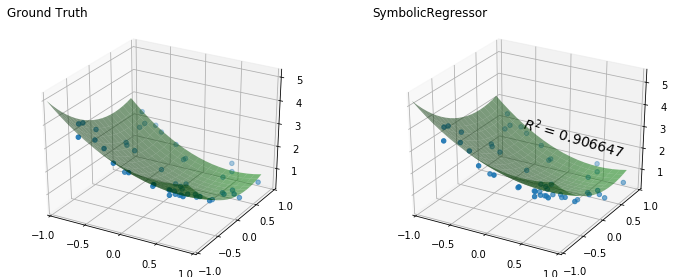

In [7]:

#PLOT THE RESULTS

y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)


fig = plt.figure(figsize=(12, 10))
    
for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.01, .5))
    ax.set_yticks(np.arange(-1, 1.01, .5))
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='green', alpha=0.5)
    points = ax.scatter(X_test[:, 0], X_test[:, 1], y_test)
    if score is not None:
        score = ax.text(-.7, 1, .2, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title,loc = 'left')

plt.show()



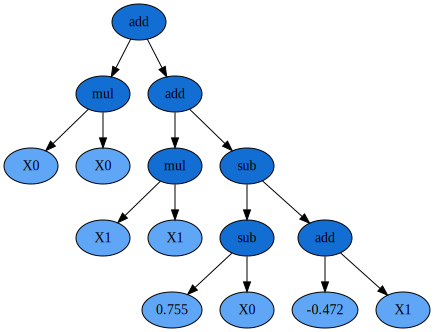

In [8]:

dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph


In [9]:
"""
Prints out how the current tree was generated and which its parents were
"""
print(est_gp._program.parents)

{'method': 'Crossover', 'parent_idx': 2899, 'parent_nodes': range(12, 15), 'donor_idx': 868, 'donor_nodes': [0, 1, 2, 3, 4, 5, 6, 7]}


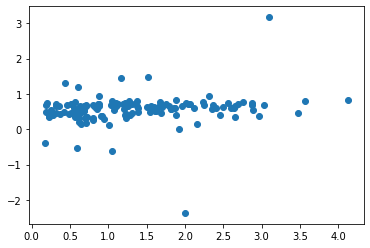

In [10]:
import hickle as hkl

density=hkl.load('density_snia_0.hkl')
rg=hkl.load('rg_snia_0.hkl')

plt.scatter(density,rg)

In [11]:
from sklearn.model_selection import train_test_split

density_train, density_test = train_test_split(density)
rg_train, rg_test = train_test_split(rg)

density_train = np.array(density_train).reshape(-1, 1)
density_test = np.array(density_test).reshape(-1, 1)
rg_train = np.array(rg_train).reshape(-1, 1)
rg_test = np.array(rg_test).reshape(-1, 1)

In [12]:
est_gp = SymbolicRegressor(population_size=5000,
                        generations=20,
                        stopping_criteria=0.01,
                        p_crossover=0.7, p_subtree_mutation=0.1,
                        p_hoist_mutation=0.05, p_point_mutation=0.1,
                        max_samples=0.9, verbose=1,
                        parsimony_coefficient=0.01, random_state=0,
                        function_set = ['add', 'sub', 'mul', 'div','sqrt','log','abs','neg',
                        'inv','max','min','sin','cos','tan'])

est_gp.fit(density_train,rg_train)



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.55          5.50242        6         0.210653         0.631479     32.73s
   1     6.16         0.669108        5         0.195236         0.606082     29.96s
   2     3.75         0.549981        2         0.186708         0.753202     23.80s
   3     2.86         0.468107        5         0.181529         0.806549     22.22s
   4     2.38          1.02943        2         0.178658         0.846092     21.52s
   5     1.97         0.485427        1         0.170944         0.883514     18.10s
   6     1.64         0.472517        2         0.174414         0.868973     16.62s
   7     1.48         0.364897        1         0.178732         0.815667     16.55s
   8     1.43          0.38744        1         0.178138         0.822788  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  generations=20, init_depth=(2, 6),
                  init_method='half and half', low_memory=False,
                  max_samples=0.9, metric='mean absolute error', n_jobs=1,
                  p_crossover=0.7, p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_point_replace=0.05, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=False)

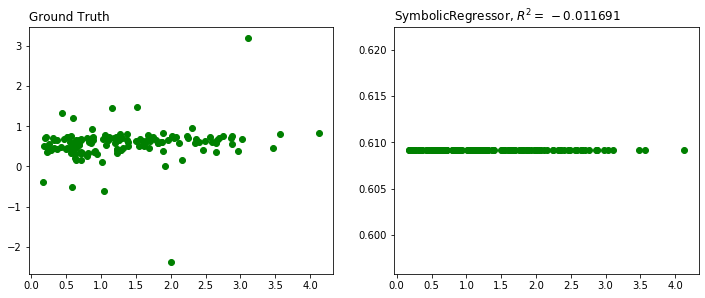

In [20]:
density = np.array(density)
rg = np.array(rg)
y_gp = est_gp.predict(np.c_[density.ravel()]).reshape(density.shape)
score_gp = est_gp.score(density_test, rg_test)


fig = plt.figure(figsize=(12, 10))

for i, (y, score, title) in enumerate([(rg, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor")]):

    ax = fig.add_subplot(2, 2, i+1)
    ax.scatter(density, y, color='green')
    if score is not None:
        title += ", " + "$R^2 =\/ %.6f$" % score
    plt.title(title,loc = 'left')

plt.show()

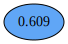

In [21]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('iages/ex1_child', format='png', cleanup=True)
graph

In [15]:
from gplearn.genetic import SymbolicClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer

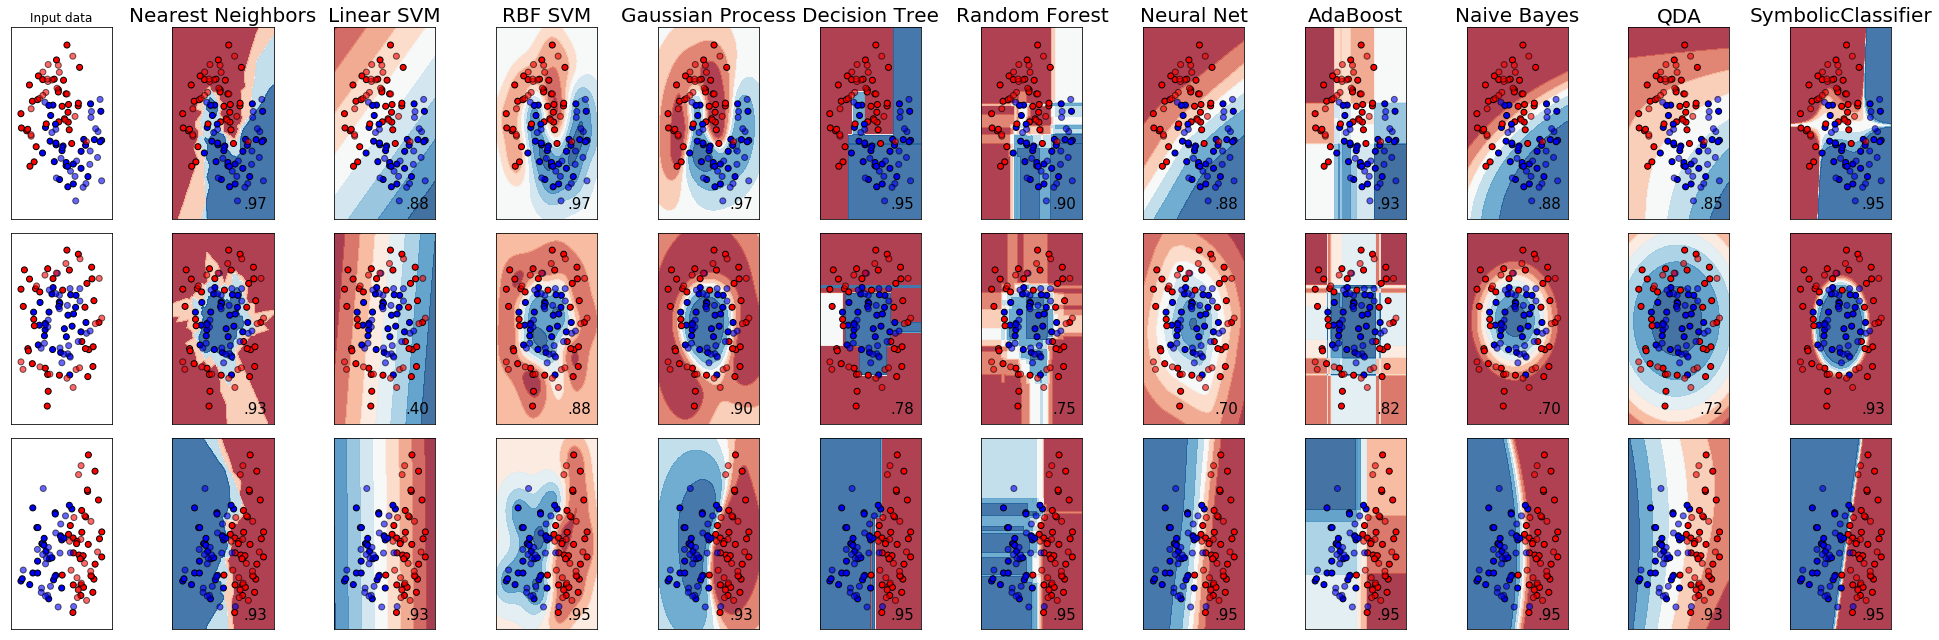

In [16]:
# Modified from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "SymbolicClassifier"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, tol=0.001),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SymbolicClassifier(random_state=0)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,fontsize = 20)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()